In [1]:
import math, time
from datetime import datetime
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchtext, spacy
from torchtext.data import Field, BucketIterator
from torchtext.data.metrics import bleu_score
from torch import optim

%load_ext autoreload
%autoreload 2

In [2]:
from lib.transformers import *
from lib.training import *
from lib.evaluation import *
from lib.datasets import *

In [3]:
bs = 64
field_src, field_trg, src_vocab, trg_vocab, src_pad_idx, trg_pad_idx, sp_src, sp_trg, device, data, iterators = get_multi30k(bs)

Trainer

In [4]:
model, optimizer, criterion = build_transformer(src_vocab, trg_vocab, src_pad_idx, trg_pad_idx, device)
trainer = Trainer(model, iterators, criterion, optimizer, device)

In [5]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(f'.tf_runs/LibTest')
writer.close()

In [6]:
eps = 10

In [7]:
trainer.train_log(eps, writer, f'{datetime.now().strftime("%Y-%m-%d %H-%M")}', "T-")

VerboseTrainer

In [8]:
model, optimizer, criterion = build_transformer(src_vocab, trg_vocab, src_pad_idx, trg_pad_idx, device)
trainer = VerboseTrainer(model, iterators, criterion, optimizer, device)

In [9]:
eps = 10

In [10]:
trainer.train(eps, 1)


Epoch 0: | Time: 1m 23s
Train loss: 6.0353017630556085
Valid loss: 4.218024522066116

Epoch 1: | Time: 1m 22s
Train loss: 3.8261806203405238
Valid loss: 3.2277660071849823

Epoch 2: | Time: 1m 22s
Train loss: 3.093068240497606
Valid loss: 2.6603732109069824

Epoch 3: | Time: 1m 23s
Train loss: 2.565169703592813
Valid loss: 2.282218113541603

Epoch 4: | Time: 1m 23s
Train loss: 2.169322951249614
Valid loss: 1.97156273573637

Epoch 5: | Time: 1m 26s
Train loss: 1.9188138173015108
Valid loss: 1.7927093803882599

Epoch 6: | Time: 1m 22s
Train loss: 1.7767694797284803
Valid loss: 1.7358791306614876

Epoch 7: | Time: 1m 23s
Train loss: 1.6956382081372097
Valid loss: 1.7434918284416199

Epoch 8: | Time: 1m 23s
Train loss: 1.671780839102909
Valid loss: 1.6617712453007698

Epoch 9: | Time: 1m 22s
Train loss: 1.6172071298838713
Valid loss: 1.6636941581964493

Total Time: 13m 54s
Final test loss: 1.6861108019948006


Evaluate Trainer

In [11]:
translator = Translator(model, sp_src, field_src, field_trg, device)
translation = translator.translate("Three brothers are playing football")
print(translation)

['drei', 'köche', 'spielen', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball', 'fußball']


In [12]:
bleu = translator.calculate_bleu(data[2])
print(bleu)

22.996988892555237


TranslatingTrainer

In [13]:
model, optimizer, criterion = build_transformer(src_vocab, trg_vocab, src_pad_idx, trg_pad_idx, device)
translator = Translator(model, sp_src, field_src, field_trg, device)
trainer = TranslatingTrainer(model, iterators, criterion, optimizer, translator, device)

In [14]:
trainer.train()


Epoch 0: | Time: 1m 33s
Train loss: 6.037329666414975
Valid loss: 4.17379991710186
['zwei', 'männer', 'in', 'einem', '<unk>', '.', '<eos>']

Epoch 1: | Time: 1m 29s
Train loss: 3.81827574206869
Valid loss: 3.254710853099823
['drei', 'hunde', 'spielen', 'im', 'freien', '.', '<eos>']

Epoch 2: | Time: 1m 31s
Train loss: 3.139283850854714
Valid loss: 2.694185122847557
['drei', 'jungen', 'spielen', 'drei', 'jungen', '.', '<eos>']

Epoch 3: | Time: 1m 32s
Train loss: 2.6144469530046774
Valid loss: 2.283024236559868
['drei', '<unk>', 'spielen', 'fußball', 'fußball', '.', '<eos>']

Epoch 4: | Time: 1m 36s
Train loss: 2.1994088410280876
Valid loss: 1.9997878074645996
['drei', '<unk>', 'spielen', 'fußball', 'fußball', ',', 'die', 'fußball', 'spielen', '.', '<eos>']

Epoch 5: | Time: 1m 36s
Train loss: 1.9343254928546856
Valid loss: 1.85004024207592
['drei', 'ringer', 'spielen', 'fußball', ',', 'während', 'eines', 'fußballspieler', 'bei', 'dem', 'fußball', 'spielen', '.', '<eos>']

Epoch 6: | T

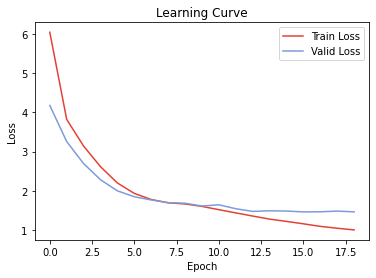

In [15]:
trainer.plot_loss()